# Neural Networks Course Exercise 1

Amirkabir University of Technology

Dr. Safabakhsh

By Gholamreza Dar

March 2022

In [61]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 18445767623344131436
]


## Imports

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.svm import SVC

%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


## Loading Data

In [63]:
df = pd.read_csv('crx.data', header=None, sep=",", na_values=["?"], names=["A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9", "A10", "A11", "A12", "A13", "A14", "A15", "A16"])

In [64]:
# Columns info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      678 non-null    object 
 1   A2      678 non-null    float64
 2   A3      690 non-null    float64
 3   A4      684 non-null    object 
 4   A5      684 non-null    object 
 5   A6      681 non-null    object 
 6   A7      681 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     677 non-null    float64
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB


In [65]:
# Data description
df.describe(include='all')

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
count,678,678.000000,690.000000,684,684,681,681,690.000000,690,690,690.00000,690,690,677.000000,690.000000,690
unique,2,NaN,NaN,3,3,14,9,NaN,2,2,NaN,2,3,NaN,NaN,2
top,b,NaN,NaN,u,g,c,v,NaN,t,f,NaN,f,g,NaN,NaN,-
freq,468,NaN,NaN,519,519,137,399,NaN,361,395,NaN,374,625,NaN,NaN,383
mean,NaN,31.568171,4.758725,NaN,NaN,NaN,NaN,2.223406,NaN,NaN,2.40000,NaN,NaN,184.014771,1017.385507,NaN
std,NaN,11.957862,4.978163,NaN,NaN,NaN,NaN,3.346513,NaN,NaN,4.86294,NaN,NaN,173.806768,5210.102598,NaN
min,NaN,13.750000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.00000,NaN,NaN,0.000000,0.000000,NaN
25%,NaN,22.602500,1.000000,NaN,NaN,NaN,NaN,0.165000,NaN,NaN,0.00000,NaN,NaN,75.000000,0.000000,NaN
50%,NaN,28.460000,2.750000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.00000,NaN,NaN,160.000000,5.000000,NaN
75%,NaN,38.230000,7.207500,NaN,NaN,NaN,NaN,2.625000,NaN,NaN,3.00000,NaN,NaN,276.000000,395.500000,NaN


In [66]:
# Count of missing values per column
df.isna().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

## 1) Preprocessing

### Handling Missing Values

#### A1

b    468
a    210
Name: A1, dtype: int64

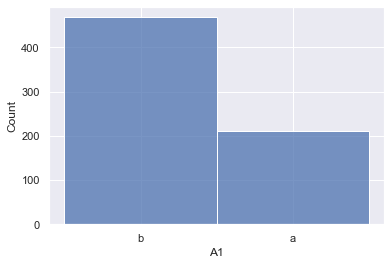

In [67]:
sns.histplot(data=df.A1)
df.A1.value_counts()

In [68]:
# Handling A1
# A1 is a categorical variable with only two values: a, b
# We can use the mode to replace the missing values with the most frequent value 'b'
df.A1.fillna(df.A1.mode()[0], inplace=True)

#### A2

A2 Mean: 31.56817109144543


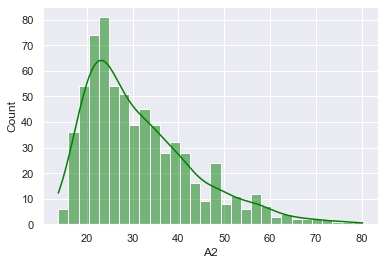

In [69]:
sns.histplot(data=df.A2, bins=30, kde=True, color='green')
print("A2 Mean:", df.A2.mean())

In [70]:
# We can fill the missing values of A2 with the mean of A2 = 31.56
df.A2.fillna(df.A2.mean(), inplace=True)

#### A4

u    519
y    163
l      2
Name: A4, dtype: int64

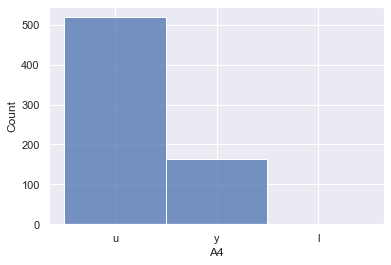

In [71]:
sns.histplot(data=df.A4)
df.A4.value_counts()

In [72]:
df.A4.fillna(df.A4.mode()[0], inplace=True)

#### A5

g     519
p     163
gg      2
Name: A5, dtype: int64

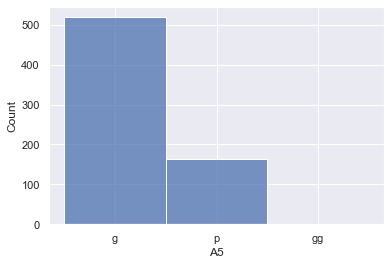

In [73]:
sns.histplot(data=df.A5)
df.A5.value_counts()

In [74]:
df.A5.fillna(df.A5.mode()[0], inplace=True)

#### A6

c     137
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
m      38
x      38
d      30
e      25
j      10
r       3
Name: A6, dtype: int64

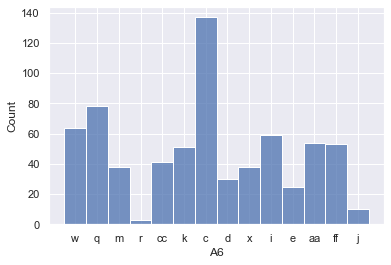

In [75]:
sns.histplot(data=df.A6)
df.A6.value_counts()

In [76]:
df.A6.fillna(df.A6.mode()[0], inplace=True)


#### A7

v     399
h     138
bb     59
ff     57
z       8
j       8
dd      6
n       4
o       2
Name: A7, dtype: int64

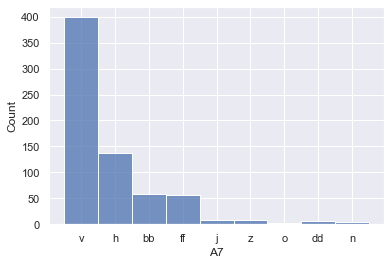

In [77]:
sns.histplot(data=df.A7)
df.A7.value_counts()

In [78]:
df.A7.fillna(df.A7.mode()[0], inplace=True)

#### A14

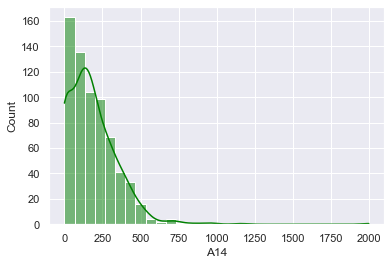

In [79]:
sns.histplot(data=df.A14, bins=30, kde=True, color='green');

In [80]:
df.A14.fillna(df.A14.mean(), inplace=True)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    float64
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    float64
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB


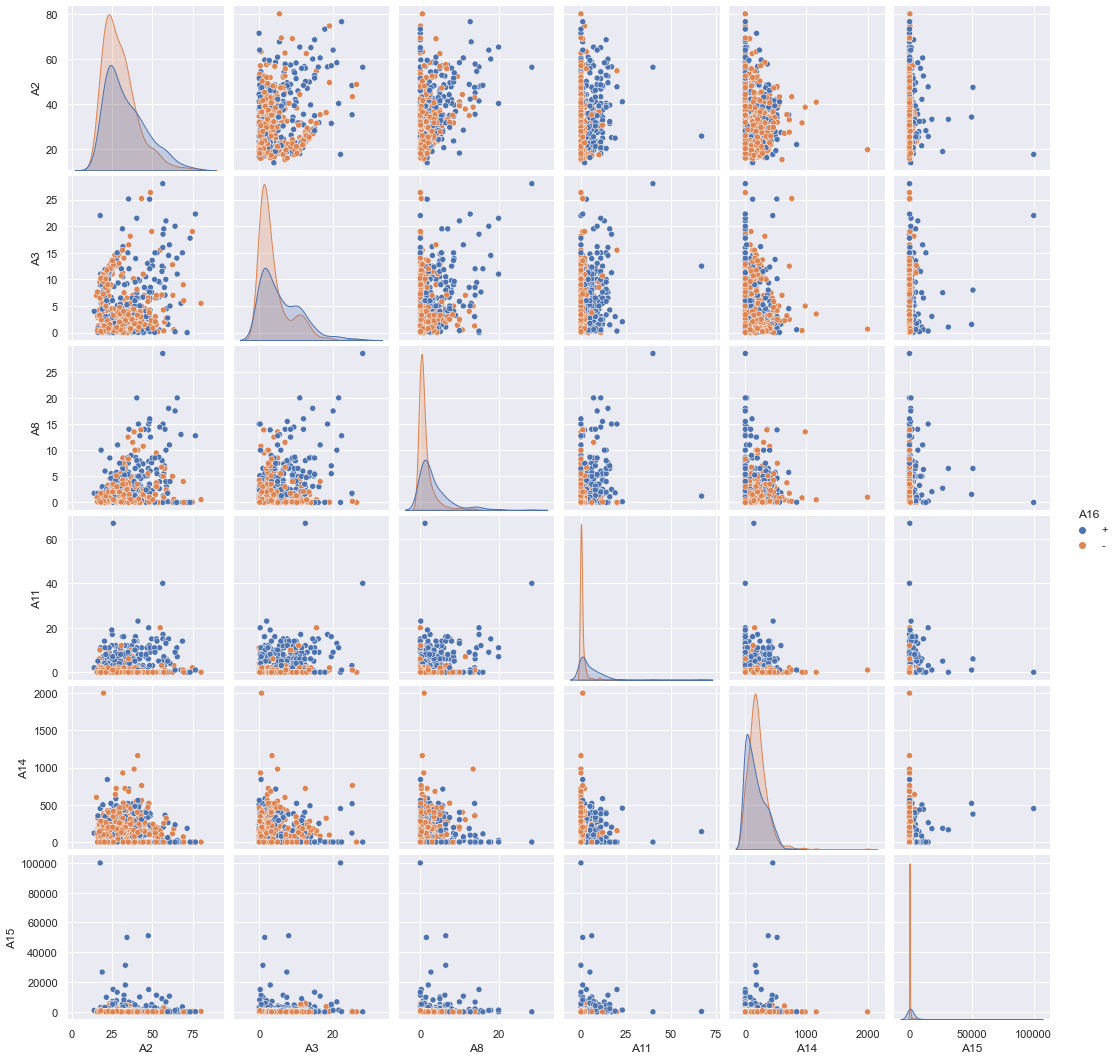

In [82]:
sns.pairplot(df, hue='A16')

### Normalizing Numerical Features

In [83]:
for col in df.dtypes[df.dtypes != 'object'].index:
    print(col)

A2
A3
A8
A11
A14
A15


In [84]:
for col in df.dtypes[df.dtypes != 'object'].index:
    # Normalization
    df[col] -= df[col].mean()
    df[col] /= df[col].std()


In [85]:
df.describe()

,A2,A3,A8,A11,A14,A15
count,6.900000e+02,6.900000e+02,6.900000e+02,6.900000e+02,6.900000e+02,6.900000e+02
mean,-5.663746e-17,1.029772e-17,1.029772e-16,1.029772e-17,4.633974e-17,1.029772e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.503228e+00,-9.559198e-01,-6.643947e-01,-4.935286e-01,-1.068864e+00,-1.952717e-01
25%,-7.506932e-01,-7.550425e-01,-6.150897e-01,-4.935286e-01,-6.041776e-01,-1.952717e-01
50%,-2.483003e-01,-4.035072e-01,-3.655762e-01,-4.935286e-01,-1.394916e-01,-1.943120e-01
75%,5.179438e-01,4.919034e-01,1.200038e-01,1.233822e-01,5.110688e-01,-1.193615e-01
max,4.107037e+00,4.668645e+00,7.851932e+00,1.328414e+01,1.054829e+01,1.899821e+01


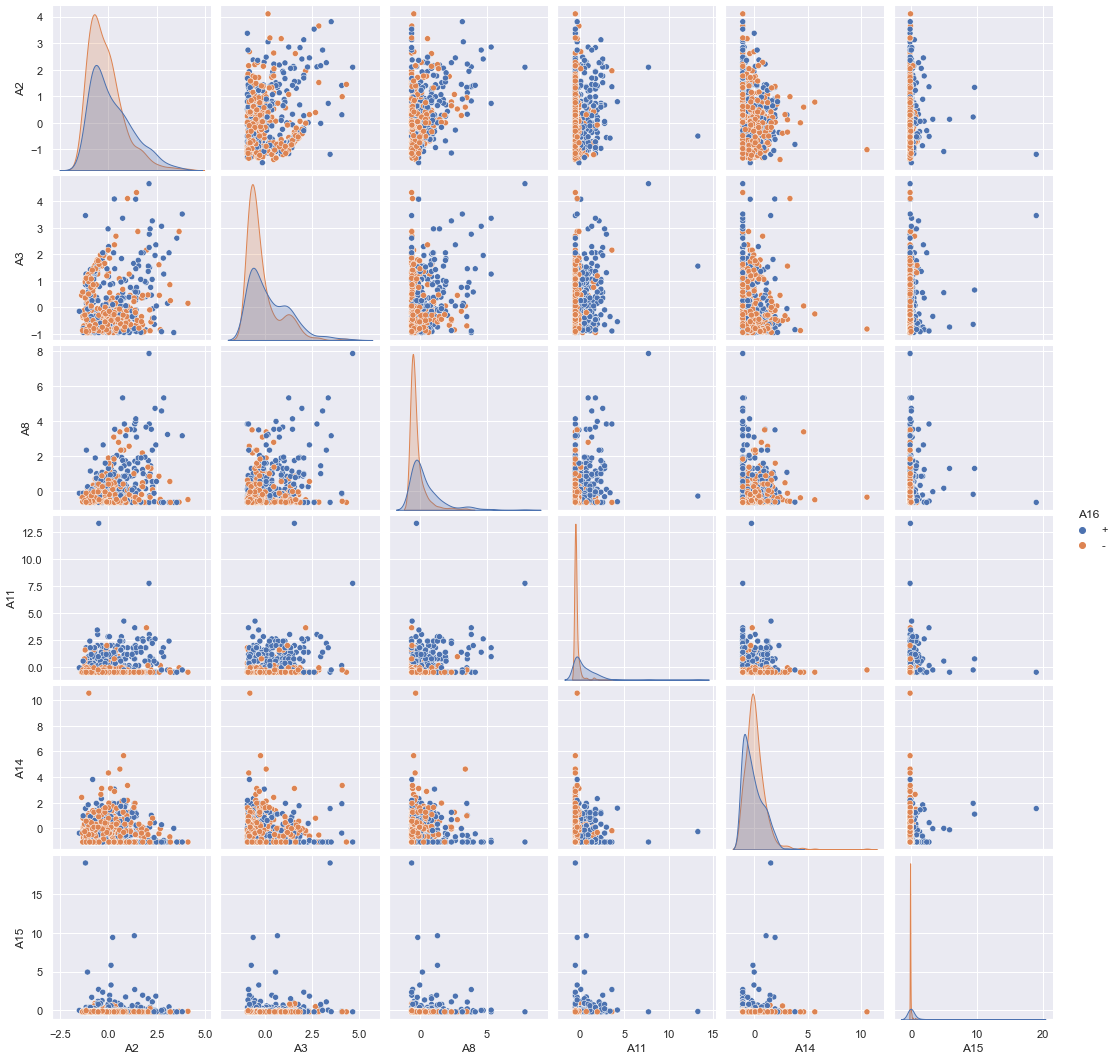

In [86]:
sns.pairplot(df, hue='A16')

### Encoding Categorical Features

In [87]:
df_old = df.copy()
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,-0.062276,-0.955920,u,g,w,v,-0.290872,t,t,-0.287892,f,g,0.104469,-0.195272,+
1,a,2.286443,-0.060007,u,g,q,h,0.244013,t,t,0.740293,f,g,-0.819095,-0.087788,+
2,a,-0.596305,-0.855481,u,g,q,h,-0.216167,t,f,-0.493529,f,g,0.557537,-0.037117,+
3,b,-0.315370,-0.646569,u,g,w,v,0.456175,t,t,0.534656,t,g,-0.488006,-0.194696,+
4,b,-0.961605,0.174015,u,g,w,v,-0.153415,t,f,-0.493529,f,s,-0.371835,-0.195272,+


In [88]:
# Integer encode the target column
df.A16.replace(['+', '-'], [1, 0], inplace=True)

In [89]:
# One-hot encode other columns
for col in df.dtypes[df.dtypes == 'object'].index:
    # One-hot encode other categorical columns
    for_dummy = df.pop(col)
    df = pd.concat([df, pd.get_dummies(for_dummy, prefix=col)], axis=1)

In [90]:
df.head()

,A2,A3,A8,A11,A14,A15,A16,A1_a,A1_b,A4_l,...,A7_z,A9_f,A9_t,A10_f,A10_t,A12_f,A12_t,A13_g,A13_p,A13_s
0,-0.062276,-0.955920,-0.290872,-0.287892,0.104469,-0.195272,1,0,1,0,...,0,0,1,0,1,1,0,1,0,0
1,2.286443,-0.060007,0.244013,0.740293,-0.819095,-0.087788,1,1,0,0,...,0,0,1,0,1,1,0,1,0,0
2,-0.596305,-0.855481,-0.216167,-0.493529,0.557537,-0.037117,1,1,0,0,...,0,0,1,1,0,1,0,1,0,0
3,-0.315370,-0.646569,0.456175,0.534656,-0.488006,-0.194696,1,0,1,0,...,0,0,1,0,1,0,1,1,0,0
4,-0.961605,0.174015,-0.153415,-0.493529,-0.371835,-0.195272,1,0,1,0,...,0,0,1,1,0,1,0,0,0,1


Now dataset is ready to be splitted and used in the training

## 2) Train Test Split

In [91]:
# Shuffle dataframe
df = df.sample(frac=1.0).reset_index(drop=True)

# Seperate X,y
X = df.drop(columns=["A16"])
y = df["A16"]

# Split to train and test
split = 0.8

X_train = X.iloc[ : int(len(X)*split),:].reset_index(drop=True)
X_test = X.iloc[int(len(X)*split) : ,:].reset_index(drop=True)

y_train = y.iloc[ : int(len(X)*split)].reset_index(drop=True)
y_test = y.iloc[int(len(X)*split) : ].reset_index(drop=True)

print(f"X size = {len(X)}")
print(f"y size = {len(y)}")
print(f"Train X size = {len(X_train)}")
print(f"Train y size = {len(y_train)}")
print(f"Test X size = {len(X_test)}")
print(f"Test y size = {len(y_test)}")

X size = 690
y size = 690
Train X size = 552
Train y size = 552
Test X size = 138
Test y size = 138


### Linear Seperability test

In [92]:
# Train a SVM classifier with all of the data (X, y)
# if we get 100% accuracy, the data is linearly separable.
# Note: Use Linear SVM with very high C value (Hard Margin).
svc = SVC(C=1e3, kernel='linear')
svc.fit(X, y)
print("SVM fitted.")

score = svc.score(X, y)
print(f"Linear SVM Score = {score}")

SVM fitted.
Linear SVM Score = 0.8652173913043478


So our data is not linearly seperable

## 3) Multilayer Perceptron

In [78]:
X.shape

(690, 46)

### Model

In [107]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# We make a function to create the model so that its easy to recreate the model
# with different hyperparameters.
def create_model():
    model = Sequential([
        Dense(32, activation='relu', input_shape=(X.shape[1],)),
        Dense(32, activation='relu'),
        Dense(2, activation='softmax'),
    ])
    return model

In [80]:
import pydot
import graphviz


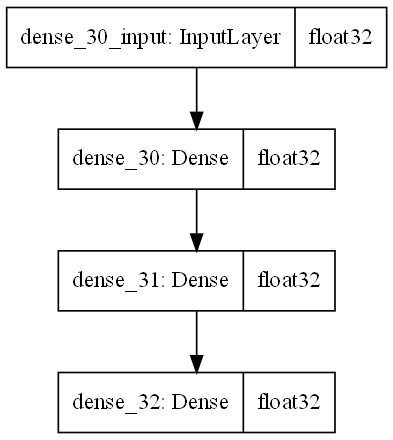

In [108]:
tf.keras.utils.plot_model(
    create_model(), to_file='model.png', show_dtype=True,
    show_layer_names=True, rankdir='TB', expand_nested=True, dpi=120,
    layer_range=None
)

### Training

In [109]:
import datetime

# Create the model and compile it
model = create_model()
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
model.summary()

# Tenserboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir, histogram_freq=1)

# Train the model
model.fit(x=X_train,
        y=y_train,
        epochs=150,
        validation_split=0.125,
        callbacks=[tensorboard_callback])


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 32)                1504      
_________________________________________________________________
dense_34 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_35 (Dense)             (None, 2)                 66        
Total params: 2,626
Trainable params: 2,626
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
16/16 [==============================] - 1s 55ms/step - loss: 0.6639 - accuracy: 0.5776 - val_loss: 0.6205 - val_accuracy: 0.6522
Epoch 2/150
16/16 [==============================] - 0s 16ms/step - loss: 0.5590 - accuracy: 0.7226 - val_loss: 0.5474 - val_accuracy: 0.7391
Epoch 3/150
16/16 [==============================] - 0s 18ms/step - loss: 0.4791 - accuracy: 0.83

In [110]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 1ms/step - loss: 0.6976 - accuracy: 0.8623


[0.6975732445716858, 0.8623188138008118]

### Tensorboard

In [84]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 15444), started 2 days, 21:19:06 ago. (Use '!kill 15444' to kill it.)

## 4) Hyperparameter Optimization

In [104]:
def create_model_best():
    model = Sequential([
        Dense(2, activation='relu', input_shape=(X.shape[1],)),
        Dense(4, activation='relu'),
        Dense(2, activation='softmax'),
    ])
    return model

import datetime

# Create the model and compile it
model = create_model_best()
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

model.summary()

# Tenserboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + " best 642"
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir, histogram_freq=1)

# Train the model
model.fit(x=X_train,
        y=y_train,
        epochs=150,
        validation_split=0.125,
        callbacks=[tensorboard_callback])

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 2)                 94        
_________________________________________________________________
dense_28 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_29 (Dense)             (None, 2)                 10        
Total params: 116
Trainable params: 116
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
16/16 [==============================] - 1s 48ms/step - loss: 0.7519 - accuracy: 0.4348 - val_loss: 0.7234 - val_accuracy: 0.4348
Epoch 2/150
16/16 [==============================] - 0s 18ms/step - loss: 0.7306 - accuracy: 0.4369 - val_loss: 0.7116 - val_accuracy: 0.4928
Epoch 3/150
16/16 [==============================] - 0s 18ms/step - loss: 0.7190 - accuracy: 0.4638 - 

In [106]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 1ms/step - loss: 0.2542 - accuracy: 0.9058


[0.2541724145412445, 0.9057971239089966]

In [64]:
# import xgboost classifier
from xgboost import XGBClassifier
# import accuracy_score
from sklearn.metrics import accuracy_score

model = XGBClassifier(max_depth=16,
                    n_estimators=250,
                    min_child_weight=16,
                    subsample=0.8,
                    learning_rate=0.01,
                    seed=42)

model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))


C:\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:49:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score is 0.84783


#### Keras Tuner

In [52]:
import keras_tuner as kt

def build_model(hp):
    model = Sequential()

    # Input Layer
    model.add(Dense(hp.Choice('first_layer_neurons', [4, 8, 32, 48, 64, 128]), activation=hp.Choice(f'first_layer_activation', ['relu', 'tanh']), input_shape=(X.shape[1],)))

    # Hidden Layers
    for i in range(hp.Choice('layers_count', [1, 2, 3, 4, 5, 6, 7])):
        model.add(Dense(hp.Choice(f'hidden_layer_{i}_neurons', [4, 8, 32, 48, 64, 128]), activation=hp.Choice(f'hidden_layer_{i}_activation', ['relu', 'tanh'])))

    # Dropout
    # if hp.Boolean("dropout"):
    #     model.add(Dropout(rate=hp.Choice(f'dropout_percentage', [0.1, 0.15, 0.2, 0.25])))

    # Last layer
    model.add(Dense(2, activation='softmax'))

    # Compile the model
    model.compile(
        optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']
        )

    return model

In [56]:
tuner = kt.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=40,
    executions_per_trial=3,
    overwrite=True,
    directory="tuner_dir",
    project_name="NN_Exercise_1_hp_tuning",
)

In [57]:
tuner.search_space_summary()

Search space summary
Default search space size: 5
first_layer_neurons (Choice)
{'default': 4, 'conditions': [], 'values': [4, 8, 32, 48, 64, 128], 'ordered': True}
first_layer_activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
layers_count (Choice)
{'default': 1, 'conditions': [], 'values': [1, 2, 3, 4, 5, 6, 7], 'ordered': True}
hidden_layer_0_neurons (Choice)
{'default': 4, 'conditions': [], 'values': [4, 8, 32, 48, 64, 128], 'ordered': True}
hidden_layer_0_activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}


In [58]:
tuner.search(X_train, y_train, epochs=50, validation_split=0.2)

Trial 40 Complete [00h 00m 10s]
val_accuracy: 0.8738738894462585

Best val_accuracy So Far: 0.8828828930854797
Total elapsed time: 00h 07m 32s
INFO:tensorflow:Oracle triggered exit


In [59]:
tuner.get_best_hyperparameters()[0].values

{'first_layer_neurons': 48,
 'first_layer_activation': 'relu',
 'layers_count': 3,
 'hidden_layer_0_neurons': 128,
 'hidden_layer_0_activation': 'relu',
 'hidden_layer_1_neurons': 8,
 'hidden_layer_1_activation': 'relu',
 'hidden_layer_2_neurons': 32,
 'hidden_layer_2_activation': 'relu',
 'hidden_layer_3_neurons': 4,
 'hidden_layer_3_activation': 'tanh',
 'hidden_layer_4_neurons': 48,
 'hidden_layer_4_activation': 'tanh',
 'hidden_layer_5_neurons': 128,
 'hidden_layer_5_activation': 'tanh',
 'hidden_layer_6_neurons': 128,
 'hidden_layer_6_activation': 'relu'}

In [60]:
tuner.results_summary()

Results summary
Results in tuner_dir\NN_Exercise_1_hp_tuning
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
first_layer_neurons: 48
first_layer_activation: relu
layers_count: 3
hidden_layer_0_neurons: 128
hidden_layer_0_activation: relu
hidden_layer_1_neurons: 8
hidden_layer_1_activation: relu
hidden_layer_2_neurons: 32
hidden_layer_2_activation: relu
hidden_layer_3_neurons: 4
hidden_layer_3_activation: tanh
hidden_layer_4_neurons: 48
hidden_layer_4_activation: tanh
hidden_layer_5_neurons: 128
hidden_layer_5_activation: tanh
hidden_layer_6_neurons: 128
hidden_layer_6_activation: relu
Score: 0.8828828930854797
Trial summary
Hyperparameters:
first_layer_neurons: 128
first_layer_activation: tanh
layers_count: 6
hidden_layer_0_neurons: 48
hidden_layer_0_activation: relu
hidden_layer_1_neurons: 128
hidden_layer_1_activation: tanh
hidden_layer_2_neurons: 64
hidden_layer_2_activation: relu
hidden_layer_3_neurons: 64
hidden_layer_3_activat

In [61]:
tuner.get_best_hyperparameters()[0].values

{'first_layer_neurons': 48,
 'first_layer_activation': 'relu',
 'layers_count': 3,
 'hidden_layer_0_neurons': 128,
 'hidden_layer_0_activation': 'relu',
 'hidden_layer_1_neurons': 8,
 'hidden_layer_1_activation': 'relu',
 'hidden_layer_2_neurons': 32,
 'hidden_layer_2_activation': 'relu',
 'hidden_layer_3_neurons': 4,
 'hidden_layer_3_activation': 'tanh',
 'hidden_layer_4_neurons': 48,
 'hidden_layer_4_activation': 'tanh',
 'hidden_layer_5_neurons': 128,
 'hidden_layer_5_activation': 'tanh',
 'hidden_layer_6_neurons': 128,
 'hidden_layer_6_activation': 'relu'}

In [62]:
models = tuner.get_best_models(num_models=2)
best_model = models[0]
best_model.build()
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 48)                2256      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               6272      
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 1032      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                288       
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 66        
Total params: 9,914
Trainable params: 9,914
Non-trainable params: 0
_________________________________________________________________


## 5) Overfit the model

In [113]:
def create_model_best():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X.shape[1],)),
        Dense(128, activation='relu'),
        Dense(256, activation='relu'),
        Dense(512, activation='relu'),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(2, activation='softmax'),
    ])
    return model

import datetime

# Create the model and compile it
model = create_model_best()
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# Tenserboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + " 128 5x128 hidden layers lru overfit"
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir, histogram_freq=1)

# Train the model
model.fit(x=X_train,
        y=y_train,
        epochs=150,
        validation_split=0.125,
        callbacks=[tensorboard_callback])

Epoch 1/150
16/16 [==============================] - 1s 54ms/step - loss: 0.4948 - accuracy: 0.7971 - val_loss: 0.4336 - val_accuracy: 0.8261
Epoch 2/150
16/16 [==============================] - 0s 16ms/step - loss: 0.3719 - accuracy: 0.8530 - val_loss: 0.4809 - val_accuracy: 0.7971
Epoch 3/150
16/16 [==============================] - 0s 20ms/step - loss: 0.3433 - accuracy: 0.8778 - val_loss: 0.4081 - val_accuracy: 0.8406
Epoch 4/150
16/16 [==============================] - 0s 18ms/step - loss: 0.2813 - accuracy: 0.8903 - val_loss: 0.4485 - val_accuracy: 0.8116
Epoch 5/150
16/16 [==============================] - 0s 18ms/step - loss: 0.2377 - accuracy: 0.9089 - val_loss: 0.4564 - val_accuracy: 0.8551
Epoch 6/150
16/16 [==============================] - 0s 18ms/step - loss: 0.2257 - accuracy: 0.9151 - val_loss: 0.4828 - val_accuracy: 0.8406
Epoch 7/150
16/16 [==============================] - 0s 18ms/step - loss: 0.1899 - accuracy: 0.9255 - val_loss: 0.5298 - val_accuracy: 0.8406
Epoch 

In [115]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 128)               6016      
_________________________________________________________________
dense_44 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_45 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_46 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_47 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_48 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_49 (Dense)             (None, 2)               

In [114]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.9952 - accuracy: 0.8841


[0.9951863884925842, 0.8840579986572266]

## 6) Generalize the model

In [119]:
# L1, L2

# Dropout

def create_model_best():
    model = Sequential([
        Dense(256, activation='relu', input_shape=(X.shape[1],), kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        Dropout(0.2),
        Dense(2, activation='softmax'),
    ])
    return model

import datetime

# Create the model and compile it
model = create_model_best()
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

model.summary()

# Tenserboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + " regularized"
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir, histogram_freq=1)

# Train the model
model.fit(x=X_train,
        y=y_train,
        epochs=150,
        validation_split=0.3,
        callbacks=[tensorboard_callback])

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 256)               12032     
_________________________________________________________________
dense_69 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_70 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_71 (Dense)             (None, 2)                 130       
Total params: 53,314
Trainable params: 53,314
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
13/13 [==============================] - 1s 60ms/step - loss: 0.5530 - accuracy: 0.7513 - val_loss: 0.4173 - val_accuracy: 0.8133
Epoch 2/150
13/13 [==============================] - 0s 20ms/step - loss: 0.3926 - accuracy: 0.8420 - val